In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
from simple_env import HuskyNavigateEnv, HuskySemanticNavigateEnv
from gibson.utils.play import play
import os
import yaml
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

config_file = os.path.join('/root/intellisearch/instance-instance.yaml')
print(config_file)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
/root/intellisearch/instance-instance.yaml


In [3]:
conf = yaml.load(open(config_file))
pprint(conf)

{'display_ui': False,
 'envname': 'HuskyNavigateEnv',
 'fov': 1.57,
 'initial_orn': [0, 0, 1.37],
 'initial_pos': [0.3, 4.5, 1.2],
 'is_discrete': True,
 'mode': 'headless',
 'model_id': 'space7',
 'output': ['nonviz_sensor', 'rgb_filled', 'depth', 'normal', 'semantics'],
 'random': {'random_init_rot_range': [-0.1, 0.1],
            'random_init_x_range': [-0.1, 0.1],
            'random_init_y_range': [-0.1, 0.1],
            'random_init_z_range': [-0.1, 0.1],
            'random_initial_pose': False,
            'random_target_pose': False,
            'random_target_range': 0.1},
 'resolution': 512,
 'semantic_color': 1,
 'semantic_source': 1,
 'show_diagnostics': True,
 'speed': {'frameskip': 1, 'timestep': 0.01},
 'target_orn': [0, 0, 1.57],
 'target_pos': [-14.3, 45.57, 0.3],
 'ui_components': ['RGB_FILLED', 'DEPTH', 'NORMAL', 'SEMANTICS'],
 'ui_num': 4,
 'use_filler': True,
 'verbose': False}


In [4]:
env = HuskySemanticNavigateEnv(config=config_file, gpu_count = 8)

  0%|          | 0/1 [00:00<?, ?it/s]

Processing the data:
Total 1 scenes 0 train 1 test
Indexing


100%|██████████| 190/190 [00:14<00:00, 14.64it/s]


In [5]:
obs_s = env.observation_space

In [6]:
obs = env.reset()

Episode: steps:0 score:0
[0, 0, 0],
Episode count: 0


In [7]:
pprint(obs)

{'depth': array([[[1.062336  ],
        [1.0622746 ],
        [1.0622132 ],
        ...,
        [1.1999456 ],
        [1.1959933 ],
        [1.192067  ]],

       [[1.0663322 ],
        [1.0662704 ],
        [1.0662085 ],
        ...,
        [1.1998931 ],
        [1.1959411 ],
        [1.1920152 ]],

       [[1.0703585 ],
        [1.0702962 ],
        [1.070234  ],
        ...,
        [1.1998407 ],
        [1.195889  ],
        [1.1919634 ]],

       ...,

       [[1.1341325 ],
        [1.1347805 ],
        [1.1354294 ],
        ...,
        [0.52011245],
        [0.52011335],
        [0.52011424]],

       [[1.1339513 ],
        [1.1345992 ],
        [1.1352477 ],
        ...,
        [0.51805174],
        [0.51805264],
        [0.5180535 ]],

       [[1.1337702 ],
        [1.1344179 ],
        [1.1350663 ],
        ...,
        [0.51600736],
        [0.51600826],
        [0.5160091 ]]], dtype=float32),
 'nonviz_sensor': array([ 0.        ,  0.51697576,  0.85600007,  0.        ,  0

<IPython.core.display.Javascript object>


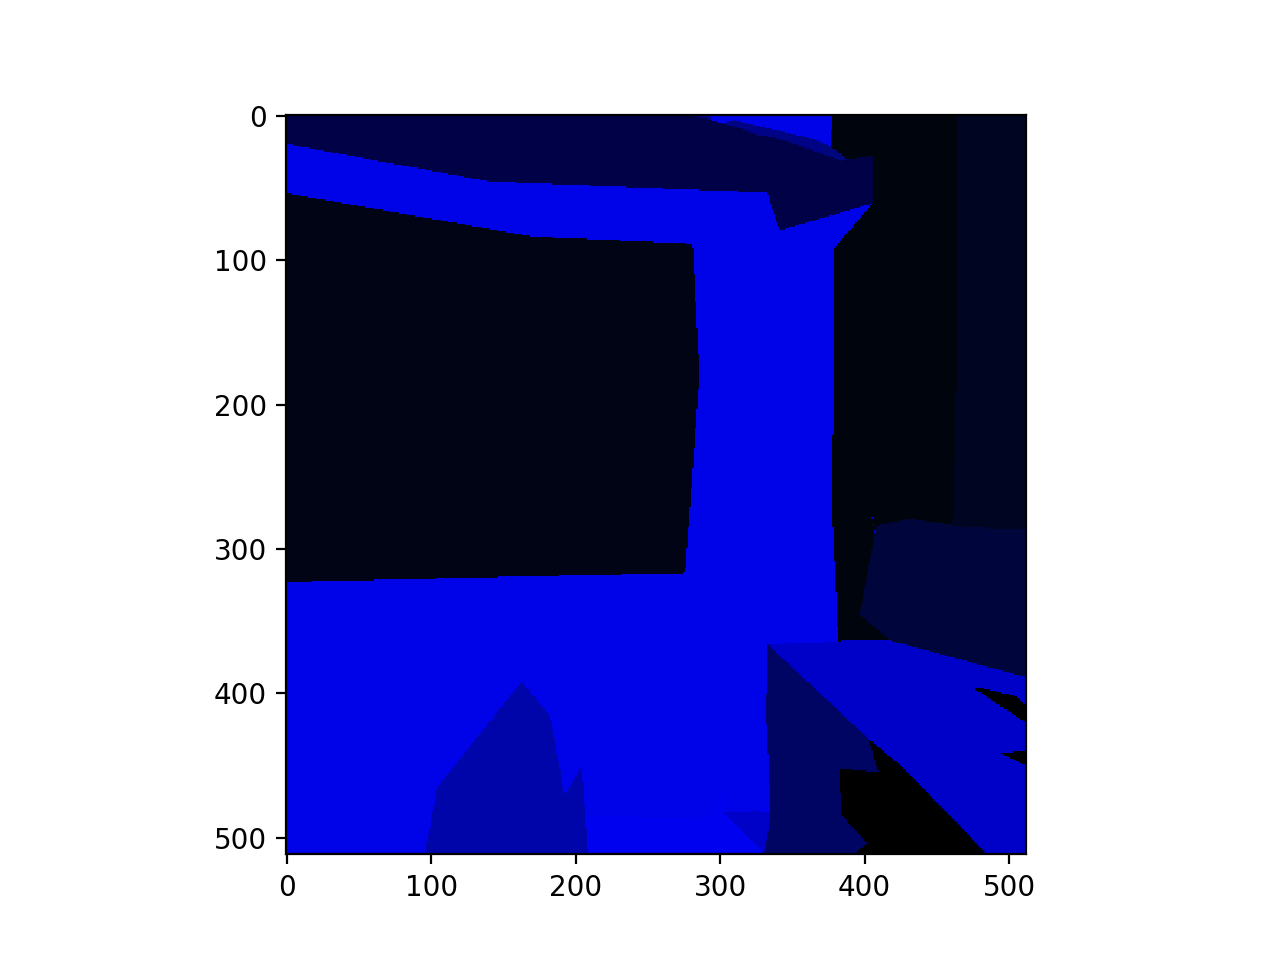

In [8]:
plt.imshow(obs['semantics'])

In [9]:
keys_to_action = env.get_keys_to_action()


In [10]:
print(keys_to_action)
import sys

def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'w':
        ax.clear()
        bx.clear()
        env.robot.move_forward()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        bx.imshow(obs['semantics'])
        fig.canvas.draw()
    if event.key == 'a':
        ax.clear()
        bx.clear()
        env.robot.turn_left()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        bx.imshow(obs['semantics'])
        fig.canvas.draw()
    if event.key == 'd':
        ax.clear()
        bx.clear()
        env.robot.turn_right()
        obs, rew, env_done, info = env.step(4)
        ax.imshow(obs['rgb_filled'])
        bx.imshow(obs['semantics'])
        fig.canvas.draw()

{(119,): 0, (): 4, (115,): 1, (97,): 3, (100,): 2}


<IPython.core.display.Javascript object>


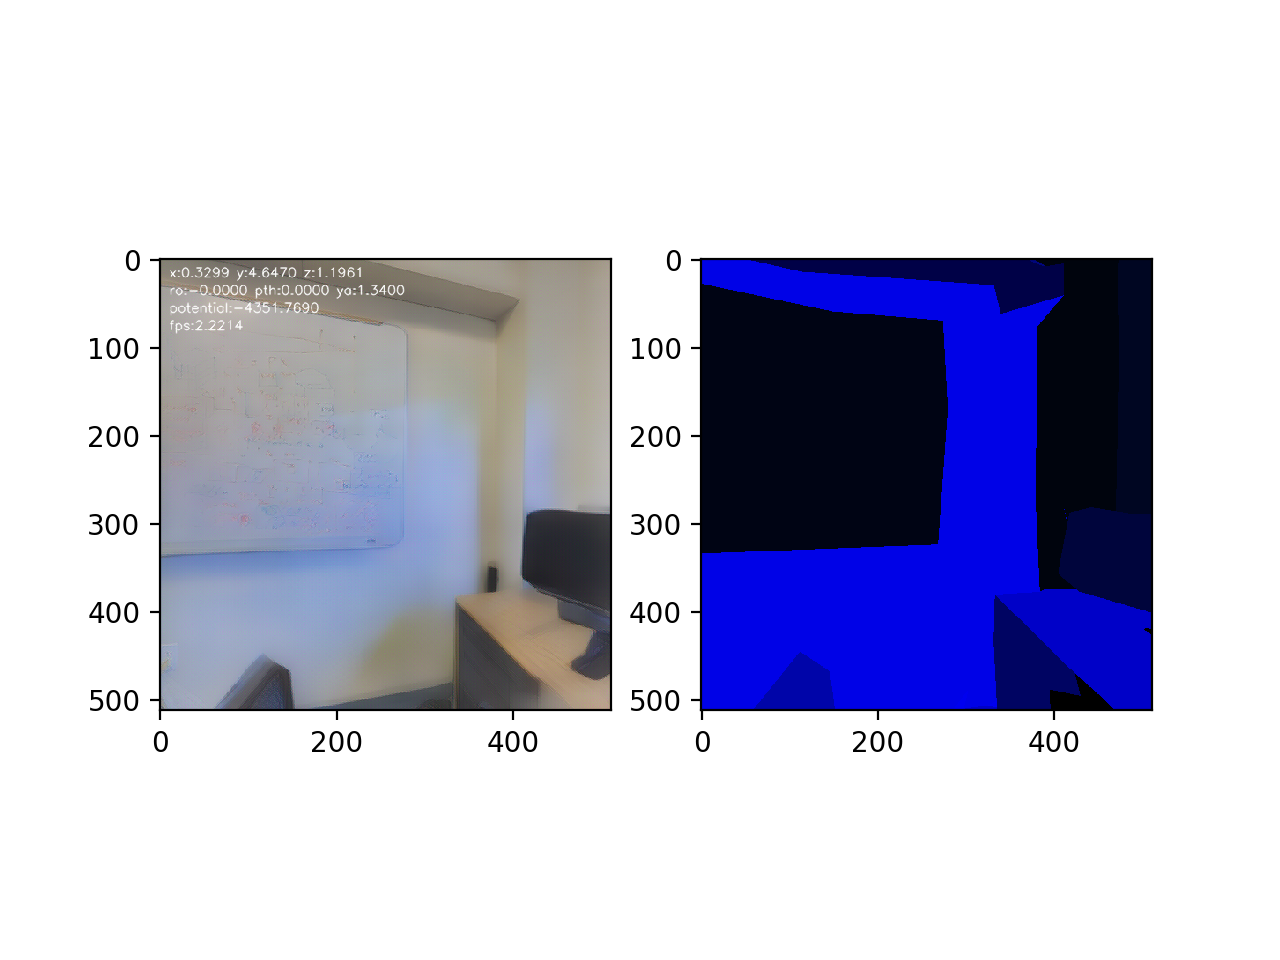

In [11]:
fig = plt.figure()
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)
plt.ion()

fig.show()
fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.draw()

for i in range(3):
    ax.clear()
    bx.clear()
    env.robot.move_forward()
    obs, rew, env_done, info = env.step(4)
    ax.imshow(obs['rgb_filled'])
    bx.imshow(obs['semantics'])
    fig.canvas.draw()